### Okay, some notes on how I got this to do what I wanted it to do.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("medical_examination.csv")

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
import seaborn as sns

### We need a column with binary value for 'weight', so we need to calculate BMI using 'weight' and 'height' and then assign a 0 or 1 based on whether BMI > 25.

In [5]:
df['bmi'] = (df['weight'] / ((df['height'] / 100) ** 2)).round(1)

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [8]:
import numpy as np

In [9]:
df['overweight'] = np.where(df['bmi'] > 25, 1, 0)

In [10]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0


### Now, we're gonna normalize our 'cholesterol' and 'gluc' data. We're going from 1 = 'normal' and 2 and 3 'above normal', to just 0 = 'normal' and 1 = 'above normal'.

In [11]:
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)

In [12]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,23.0,0


In [13]:
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)

In [14]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0


### Great. Now, we want to use seaborn's catplot() function, so we're going to massage this dataframe from wide format to long format. In other words, changing each combination of 'cardio' (our target variable) and other examination features 'gluc', 'alco', etc. into its own row (or observation).

In [15]:
df_cat = pd.melt(df, id_vars="cardio", value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

In [19]:
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


### So, some pandas magic is in order. Using groupby(), we're gonna group the data into a multi-index series, using 'cardio' and 'variable', and grab the value counts for each 'value' 1 or 0. Basically the number of observations where you either do or do not have cardiovascular disease, and the presence of each subjective feature, e.g. alcohol intake. 

In [34]:
grp = df_cat.groupby(["cardio", "variable"])['value'].value_counts()

In [35]:
grp

cardio  variable     value
0       active       1        28643
                     0         6378
        alco         0        33080
                     1         1941
        cholesterol  0        29330
                     1         5691
        gluc         0        30894
                     1         4127
        overweight   1        19006
                     0        16015
        smoke        0        31781
                     1         3240
1       active       1        27618
                     0         7361
        alco         0        33156
                     1         1823
        cholesterol  0        23055
                     1        11924
        gluc         0        28585
                     1         6394
        overweight   1        24362
                     0        10617
        smoke        0        32050
                     1         2929
Name: value, dtype: int64

### Now we can collapse this series into a dataframe using reset_index and giving the value_count its own column with the name 'total', or total observations of said combination.

In [36]:
grp = grp.reset_index(name="total")

In [37]:
grp

,cardio,variable,value,total
0,0,active,1,28643
1,0,active,0,6378
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,1,19006
9,0,overweight,0,16015


### Now, we can plot this using catplot(). Args: data takes the dataframe, x and y are self-explanatory, kind chooses what type of plot, hue basically gives you number of bars by way of unique 'value' (thus 2 bars for 0 and 1), and col lets you make separate plots for values in a given column, here 'cardio' which was our target variable!

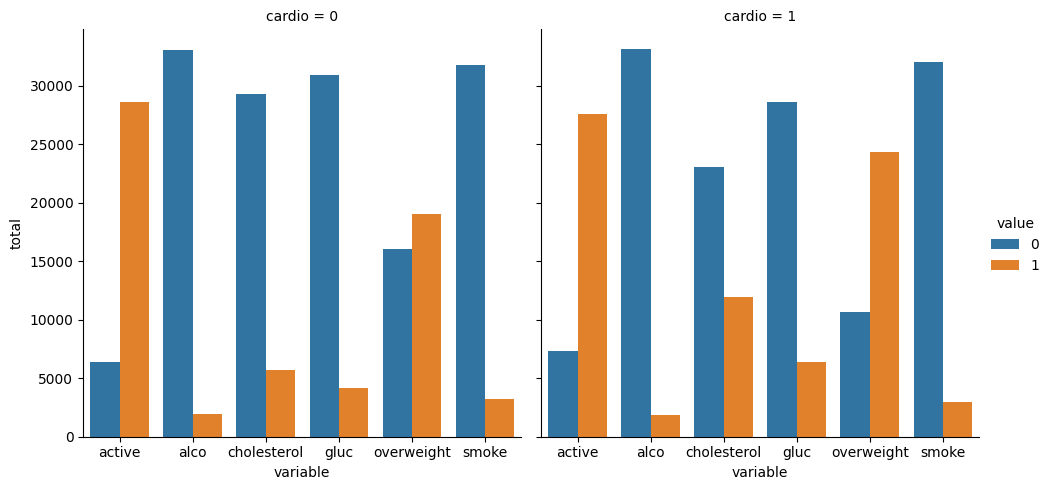

In [39]:
sns.catplot(data=grp, x='variable', y='total', kind='bar', hue='value', col='cardio')

### By the way, this plot suggests to me that being overweight and having high cholesterol are common among people with cardiovascular disease.

In [40]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.9,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.5,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.4,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.1,1


In [41]:
df_heat = df[df['ap_lo'] <= df['ap_hi']] # Apostolic bp should be lower than diastolic
df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)] # Keep heights above 2.5th percentile
df_heat = df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)] # Keep heights below 97.5th percentile
df_heat = df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)] # Keep weights above 2.5th percentile
df_heat = df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

In [42]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.7,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.4,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.9,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.1,1


In [46]:
df_heat.drop(columns='bmi', inplace=True)

In [47]:
corr = df_heat.corr()

In [48]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000992
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.090303
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.057295
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.159776
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655693
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.017031
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169493
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.127465
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.087733
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.005665
